# Weekly Exercises 1, 2 and 3
Wessel Wegerif

**Hi!**
First I import pandas, seaborn and matplotlib for working with the csv's, calculation and plotting..

In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


I open the files steps and survey, and choose a ; or a , as the separator, to make them compatible. I also show the first few lines

In [17]:
steps = pd.read_csv("steps.csv",sep=";")
survey = pd.read_csv("survey.csv", sep=",")
survey.head(3)


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0


In [18]:
steps.head(3)


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN


I combine the files, and remove any impossible values, such as a weight higher than 200 or lower than 40.

In [19]:
df = pd.merge(steps, survey, on = 'id')
df = df[(df["weight"] < 200) & (df["weight"] > 40)]
weight = df["weight"].value_counts()
weight.head(5)

72.0    40
65.0    35
73.0    32
80.0    31
55.0    31
Name: weight, dtype: int64

Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 


In [20]:
#Mean steps per participant  = mspp
df["mspp"] = df.iloc[:, 10:].mean(axis=1)
df["mspp"].head
print(df["mspp"].head(5))

0    9946.170732
1    5523.712500
2    8147.687500
3    3038.500000
4    4949.827586
Name: mspp, dtype: float64


C:\Users\Wessel\AppData\Local\Temp\ipykernel_20764\1588819801.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["mspp"] = df.iloc[:, 10:].mean(axis=1)


Now we have the 5 most common weights. let's put everything into a graaaph

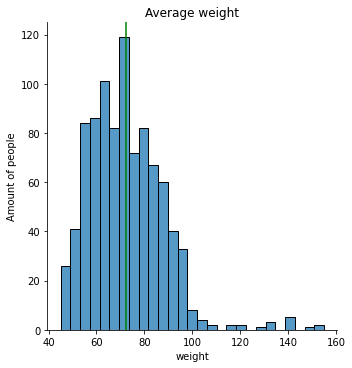

In [21]:
sns.displot(df['weight'].dropna(), kde=False)
plt.title('Average weight')
plt.axvline(df["weight"].mean(), 0, 100, color='green', label='median')
plt.xlabel('weight')
plt.ylabel("Amount of people")
plt.show()

c:\Users\Wessel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Wessel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Wessel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


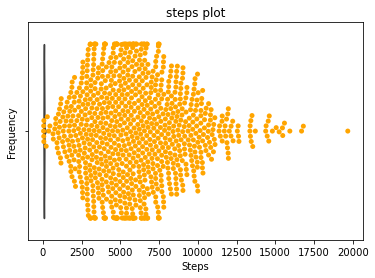

In [22]:
df = df[(df["mspp"] < 20000) & (df["mspp"] > 40)]
sns.violinplot(df['weight'])
sns.swarmplot(df['mspp'], color='orange') #default color doesn't stand out
plt.title('steps plot')
plt.ylabel('Frequency')
plt.xlabel('Steps')
plt.show()

**An analysis of mean steps per participant**
The first histogram displays the average weight, which shows a little skewed curve around the median.

The relation of mean steps per participant with two categorical variables is hard to demonstrate. Here I tried to show the correlelation between the weight of people and the average steps per person, but the weight is significantly less than the steps, and hence the violin plot is a single line.

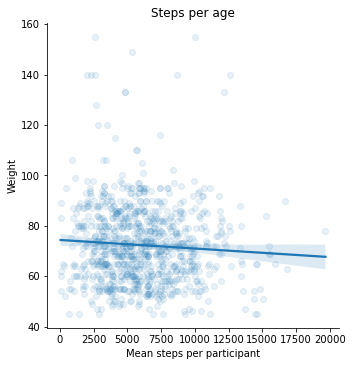

In [23]:
sns.lmplot(x='mspp', y='weight', fit_reg=True, data=df, scatter_kws={'alpha':0.1}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Mean steps per participant') #use matplotlib to refine Seaborn plot
plt.ylabel('Weight')
plt.title('Steps per age')
plt.show()

This is a better visualization of the average weight of people and what correlates to their mean steps. As you can see, there is a big cluster where the average amount of steps are, but it's not necessarily consise. The average weight does not seem to have a significant impact on the mean steps per participant.

The mean steps are: 6051.295274155996 steps
The median steps are: 5757.586956521739 steps
The standard deviation steps are: 3039.808029406082 steps


c:\Users\Wessel\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


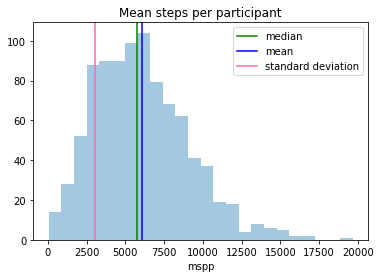

In [24]:
mean_steps = df["mspp"].mean()
median_steps = df["mspp"].median()
standardDeviation = np.std(df["mspp"])

print(f'The mean steps are: {mean_steps} steps')
print(f'The median steps are: {median_steps} steps')
print(f'The standard deviation steps are: {standardDeviation} steps')

sns.distplot(df["mspp"], kde=False)
plt.title("Mean steps per participant")
plt.axvline(median_steps, 0, 100, color='green', label='median')
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')
plt.axvline(standardDeviation, 0, 100, color='hotpink', label='standard deviation')
plt.legend()
plt.show()


Normality: there are no extremes standing out
Variation: most of the steps are below 10000
Modality: there is one big peak and one smaller peak at 130000
Skewness: the graph is skewed to the right. This is characterized by the mean being larger than the medium.
Outliers: above 12500 there are some people that walk way more than the mean steps.

# Weekly Exercises 2: correlation
Make a scatterplot matrix of the numerical variables
Make a correlation matrix of the numerical variables
Describe and interpret the results

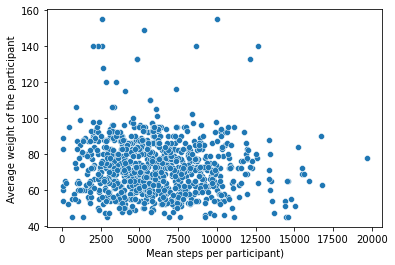

count      917.000000
mean      6051.295274
std       3041.466861
min         48.800000
25%       3830.935484
50%       5757.586957
75%       7884.128378
max      19677.368421
Name: mspp, dtype: float64

In [25]:
sns.scatterplot(x='mspp', y='weight', data=df)
plt.xlabel('Mean steps per participant)')
plt.ylabel('Average weight of the participant')
plt.show()
df["mspp"].describe()

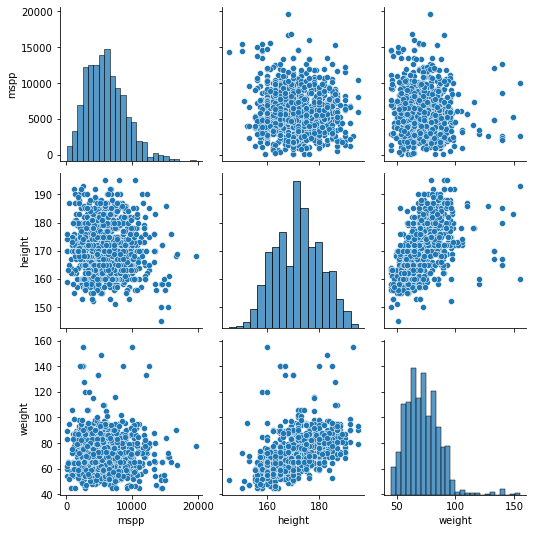

In [26]:
df_sel = df[['mspp', 'height', 'weight']] #making a new dataframe with a subset
sns.pairplot(df_sel)
plt.show()

In [27]:
corr = df_sel.corr()
print(corr)

            mspp    height    weight
mspp    1.000000 -0.055255 -0.066962
height -0.055255  1.000000  0.508838
weight -0.066962  0.508838  1.000000


# Interpretation
Describe and interpret the results
The scatterplot (pairplot) shows nice graphs
The correlation matrix shows a small significance in mspp and height/weight, but height shows a large significance compared to weight.


# Weekly assignment 3: linear regression
Make a scatterplot matrix of the numerical variables
Make a correlation matrix of the numerical variables
Describe and interpret the results

Linear regression is a way to show the relationship between a dependent and an independent variable. 

Dummy variables:

In [28]:
dfDummies = pd.get_dummies(df)
dfDummies.info

<bound method DataFrame.info of       id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6

Great! Dummies. Now let's do linear regression

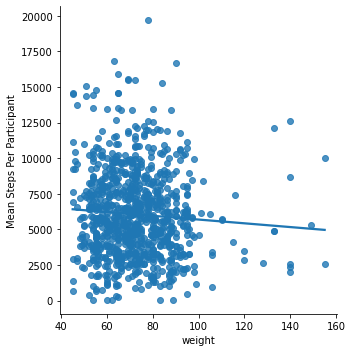

In [31]:
sns.lmplot(y="mspp", x="weight", data=df, ci=True)
plt.ylabel("Mean Steps Per Participant")
plt.xlabel("weight")
plt.show()

In [30]:
x = df['weight']
y = df['mspp']


# create a model
lm = LinearRegression()
lm.fit(x, y)

df['mspp_p'] = lm.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 98.  77.  83.  80.  61.  63.  75.  88.  69.  93.  61.  60.  75.  83.
  50.  68.  68.  83.  60.  54.  95.  73.  70.  78.  73. 140.  72.  58.
  52.  60.  95.  80.  47.  54.  58.  88.  87.  60.  90.  90.  90.  72.
  73.  73.  61.  62.  68.  70.  85.  63.  85. 120.  75.  80.  69.  65.
  83.  86.  81.  96. 133.  82.  58.  54.  78.  60.  45.  54.  64.  45.
  69.  86.  72.  63.  58.  72.  84.  89.  80.  53.  93.  67.  83.  72.
  64.  72.  60.  64.  80.  72.  80.  72.  73.  55.  67.  76.  70.  68.
  86.  52.  72.  76.  97.  67.  68.  96.  69.  55.  76.  83.  95.  86.
  78.  45.  48.  60.  65.  89.  45.  55.  55.  64.  71.  60.  87.  72.
  56. 105.  51.  58.  56.  72.  93.  65.  72.  65.  60.  70.  83.  73.
  60.  67.  75.  71.  84.  78.  50.  59.  80.  89.  98. 106.  65.  60.
  54.  79.  78.  53.  86.  64.  80.  54.  64.  76.  65.  85.  47.  59.
  95.  72.  66.  88.  92.  77.  62.  92.  55.  46.  68.  49.  69.  60.
  96.  64.  71.  61.  76.  78.  73.  55.  56.  71.  66.  62.  45.  64.
  50.  64.  63.  66.  94.  68.  56.  74.  74.  79.  74.  79.  62.  71.
  63.  58.  65.  64.  80.  74.  62.  68.  88.  60.  55.  80.  67.  69.
  71.  65.  78.  75.  54.  66.  54.  76.  50.  74.  65.  54.  57.  85.
  68.  72.  64.  49.  71.  64.  87.  64.  80.  94.  66.  57.  65.  74.
 149.  72.  65.  73.  53.  59.  83.  90.  55.  58.  54.  45.  73.  68.
  89. 110.  76.  66.  78.  90.  65.  85.  62.  56.  56.  86.  79.  87.
  55.  63.  63.  64.  75. 110.  55.  75.  67.  95.  59.  71.  79.  76.
  61.  97.  55.  90.  51.  80.  92.  74.  54.  53.  62.  69.  88.  86.
  49.  78.  92.  57.  95.  74.  70.  99.  68.  68. 140.  59.  86.  72.
  72.  90.  68.  96.  53.  98.  69.  87.  54.  90.  72.  74.  65.  79.
  63.  75.  59.  95.  95.  87.  87.  74.  73.  57.  63.  86.  64.  72.
  64.  57.  73.  95.  67.  61.  70.  90.  58.  68. 106.  74.  58.  76.
  72.  61.  75.  61.  58.  80.  72.  47.  89.  70.  93.  75.  83.  97.
  86.  56.  57.  93.  45.  61. 140.  79.  72.  95. 100.  82.  65.  55.
  66.  55.  78.  82.  84.  54.  80.  65.  65.  52.  62.  76.  86.  60.
  88.  95.  54.  54.  88.  74.  80.  90.  85.  61.  69.  66.  68.  58.
  87.  66.  80.  95.  69.  88.  77.  55.  76.  89.  88.  95.  73.  81.
  89.  88.  49.  73.  68.  74.  54.  80.  54.  55.  68.  78.  53.  72.
  92.  82.  70. 102.  68.  65.  82.  77.  52.  72.  79.  81.  86.  50.
  60.  74.  63.  60.  73.  90.  71.  64.  78.  85.  72.  83.  60.  69.
  77.  71.  85.  58. 133.  85.  51.  66.  49.  52.  82.  60.  66.  55.
  65.  78.  70.  85.  74.  56.  82.  75.  65.  73.  68.  73.  70.  55.
  69.  62.  69.  50.  68.  65.  52.  73.  62.  69.  62.  75.  60.  94.
  80.  57.  65.  73.  54.  70.  78.  56.  60.  52.  65.  86.  84.  86.
  84.  66.  62.  55.  56.  70.  83.  84.  68.  58.  55. 155.  64.  83.
  77.  89.  78.  61.  90.  69.  64.  54.  72.  77.  63.  59.  55.  60.
  86.  79.  84.  74.  65.  69.  93.  77.  64.  70.  70.  81.  88.  74.
  94. 116.  62. 140.  87.  46.  88.  63.  74.  69.  69.  76.  52.  93.
  69.  81.  80.  70.  66.  62.  69.  83.  70.  68.  63.  59.  56.  57.
  73. 106.  93.  83.  53.  58.  64.  59.  62.  62.  60.  66.  82.  64.
  71.  54.  79.  69.  79.  63.  73.  65.  45.  79.  74.  45.  76.  53.
  80.  54.  70.  55.  86.  80.  97.  64.  71.  58.  70. 120.  78.  84.
  80.  87.  56.  68.  92.  58.  63.  85.  80.  68.  75.  90.  76.  86.
  77.  55.  72.  71.  81.  74. 128.  63.  67.  64.  53.  61.  48.  78.
  95.  72.  83.  77.  95. 115.  53.  70.  92.  78.  73.  80.  85.  74.
  94.  75.  73.  72.  62.  94.  65.  69.  84.  75.  63.  78.  52.  56.
  83.  59.  92.  53.  88.  55.  55.  68.  75.  58.  71.  48.  84.  90.
  65.  65.  95.  70.  65.  61.  58.  53.  61.  79.  53.  90.  95.  71.
  82.  86.  65.  70.  80.  72.  50.  61.  85.  72.  53.  60.  56.  56.
  59.  64.  67.  50.  82.  83.  46.  76.  57.  72.  72.  81.  87.  60.
  58.  61.  75.  52.  78.  82.  73.  67.  62.  73.  88.  79.  60.  63.
  58.  92.  71.  92.  78.  55.  77.  51.  72.  90.  64.  55. 133.  83.
  72.  66.  81.  80.  67.  82.  54.  61.  85.  84.  65.  59.  53.  78.
  59. 101.  60.  77.  75.  54.  71.  82.  81.  54.  72.  73.  69.  70.
  80. 155.  60.  80.  66.  60.  86.  55.  86.  76.  84.  79.  72.  61.
  73.  55.  55.  68.  82.  71.  71.  81.  86.  70.  90.  69.  76.  82.
  83.  78.  79.  93.  65.  73.  87.  88.  73.  55.  90.  83.  69.  83.
  64.  98.  64.  80.  95.  88.  75.  68.  96.  62.  47.  50.  80.  85.
  60.  70.  69.  73.  65.  65.  47.  86.  54.  83.  56. 140.  56.  73.
  57.  79.  87.  72.  64.  51.  60.  70.  78.  58.  73.  52.  59.  71.
  72.  48.  84.  83.  66.  57.  55.  82.  72.  58.  93.  93.  70.  88.
  59.  65.  59.  90.  71.  65.  76.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df[['mspp', 'mspp_p', 'weight']]

KeyError: "['weight_p'] not in index"

In [ ]:
r2_score(df["mspp"], df["mspp_p"])

In [ ]:

math.sqrt(mean_squared_error(df["mspp"], df["mspp_p"]))
#How much is the model typically off

# Conclusion

I don't know where I went wrong and why my linear regression won't work. I changed all the variables and I don't see the reason why it shouldn't work.
Anyway, the model is probably a little off considering the high amounts of NaN and zeroes.